In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:

data=pd.read_csv("aerofit.csv")

**Observations** on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary


In [ ]:
print("shape of the data:\n",data.shape)

shape of the data:
 (180, 9)


In [ ]:

data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# convert columns like Product,MaritalStatus,Gender,Fitness into a column
data['Product']=data['Product'].astype("category")
data['Gender']=data['Gender'].astype("category")
data['MaritalStatus']=data['MaritalStatus'].astype("category")
data['Fitness']=data['Fitness']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [ ]:
data.describe() # calculate normal statistics

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


The mean and median (50th percentile) are closely aligned but not identical, enabling the identification of outliers using these statistical measures.

# Value counts

In [ ]:
for col in data.columns:
  print("----",col,"----")
  print(data[col].value_counts().sort_values())
  print("\n\n")

---- Product ----
KP781    40
KP481    60
KP281    80
Name: Product, dtype: int64



---- Age ----
42     1
39     1
41     1
43     1
44     1
18     1
50     1
46     1
36     1
47     2
45     2
37     2
48     2
19     4
32     4
40     5
20     5
34     6
31     6
29     6
27     7
22     7
21     7
38     7
30     7
33     8
35     8
28     9
26    12
24    12
23    18
25    25
Name: Age, dtype: int64



---- Gender ----
Female     76
Male      104
Name: Gender, dtype: int64



---- Education ----
20     1
12     3
21     3
15     5
13     5
18    23
14    55
16    85
Name: Education, dtype: int64



---- MaritalStatus ----
Single        73
Partnered    107
Name: MaritalStatus, dtype: int64



---- Usage ----
7     2
6     7
5    17
2    33
4    52
3    69
Name: Usage, dtype: int64



---- Fitness ----
1     2
4    24
2    26
5    31
3    97
Name: Fitness, dtype: int64



---- Income ----
95508      1
99601      1
103336     1
85906      1
52290      1
          ..
53439      8
5

# Unique Attributes :
there are no unique attributes

# missing values

In [ ]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No missing values are there.

# outliers detection

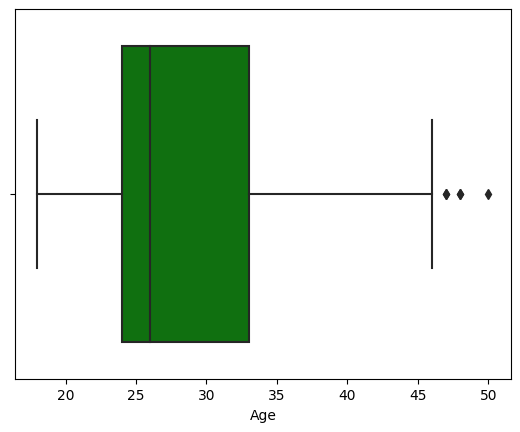

In [ ]:
#age
ax = sns.boxplot(x=data['Age'],color='green')


the box plot of the column Age there are outliers of age greater than 46 years

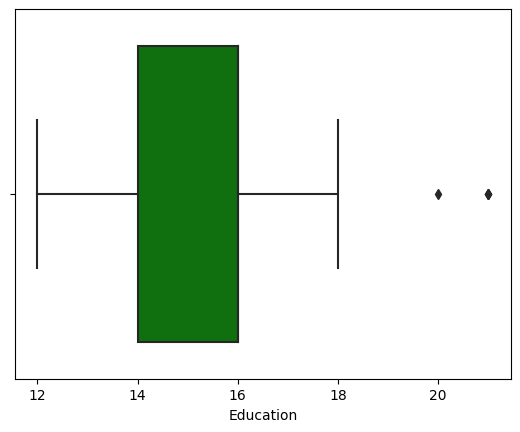

In [ ]:

# Education
ax = sns.boxplot(x=data['Education'],color='green')

the column Education has outliers of education greater than equal to 20 years.

In [ ]:

# Find the age of person who has education greater than equal to  years
data[data['Education']>=20].Age

156    25
157    26
161    27
175    40
Name: Age, dtype: int64

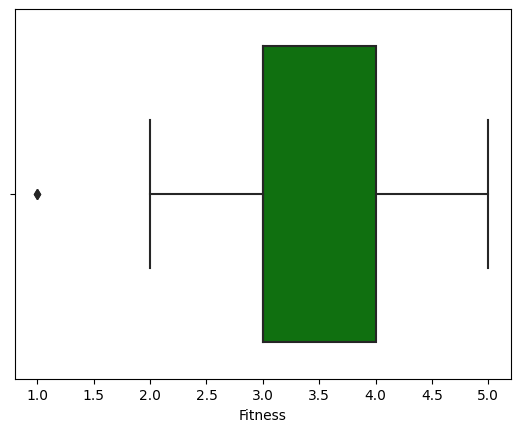

In [ ]:
# Fitness
ax = sns.boxplot(x=data['Fitness'],color='green')

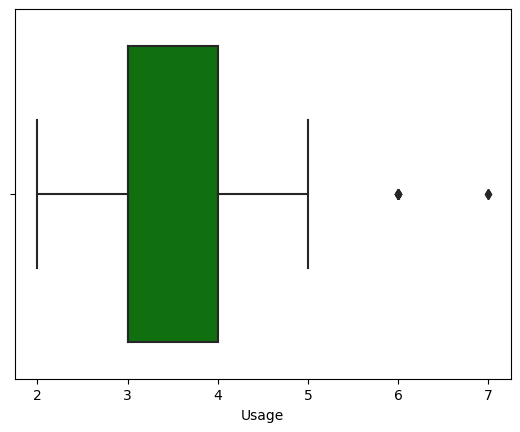

In [ ]:

# Usage
ax = sns.boxplot(x=data['Usage'],color='green')

the max usage may be because of professionals athletes

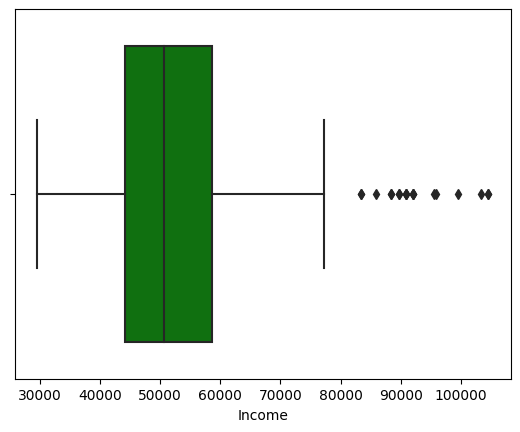

In [ ]:

# Income
ax = sns.boxplot(x=data['Income'],color='green')

There are heavy number of outliers in Income column.But these people might be business man

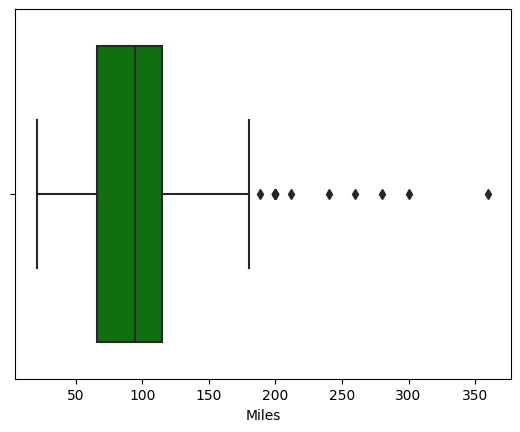

In [ ]:

# Miles
ax = sns.boxplot(x=data['Miles'],color='green')

miles have some outragious outliers

# scatter plot age vs miles

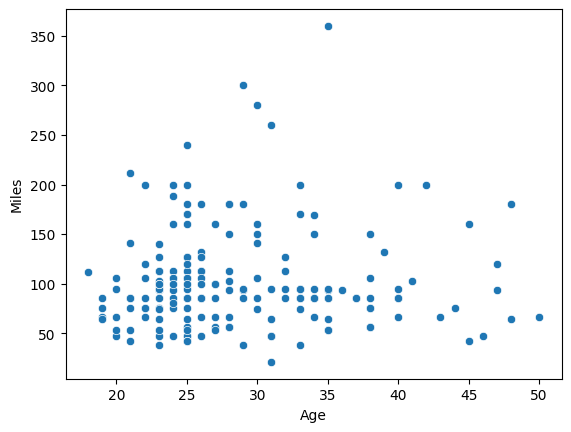

In [ ]:

sns.scatterplot(x='Age',y='Miles',data=data)
plt.show()

The person who is 35 years old has run more than 350

# usage vs income

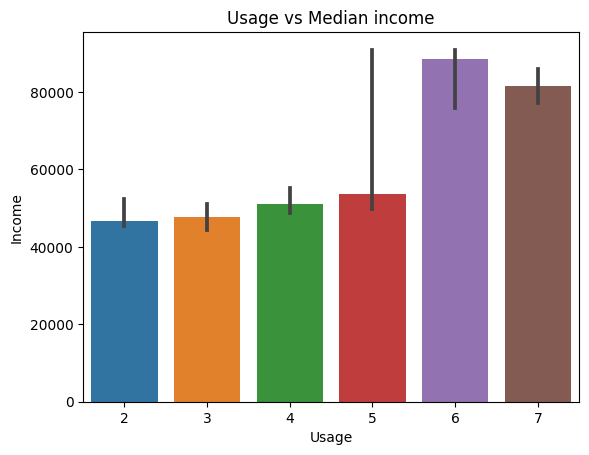

In [ ]:
sns.barplot(x='Usage',y='Income',data=data,estimator=np.median) # here median used as some people have very high income
                                                                # compared to thers
plt.title("Usage vs Median income")
plt.show()

This plot indicates people with low median income have low usage time.On the other hand the people with high median income are having more usage time

# fitness vs income

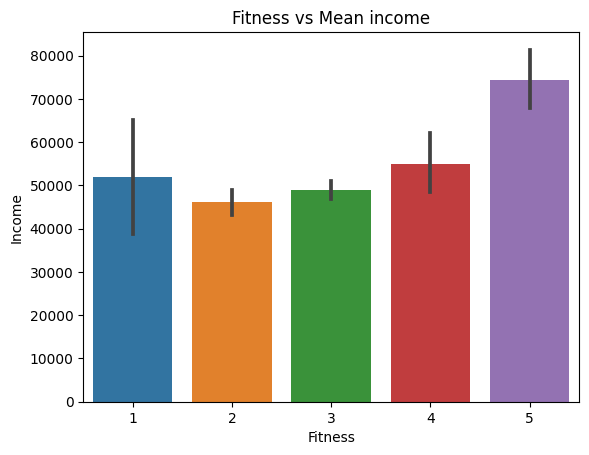

In [ ]:
sns.barplot(x='Fitness',y='Income',data=data,estimator=np.mean)
plt.title("Fitness vs Mean income")
plt.show()

People with low mean income are in moderate fit.People with heighest mean income have great fitness

# Visual Analysis - Univariate & Bivariate

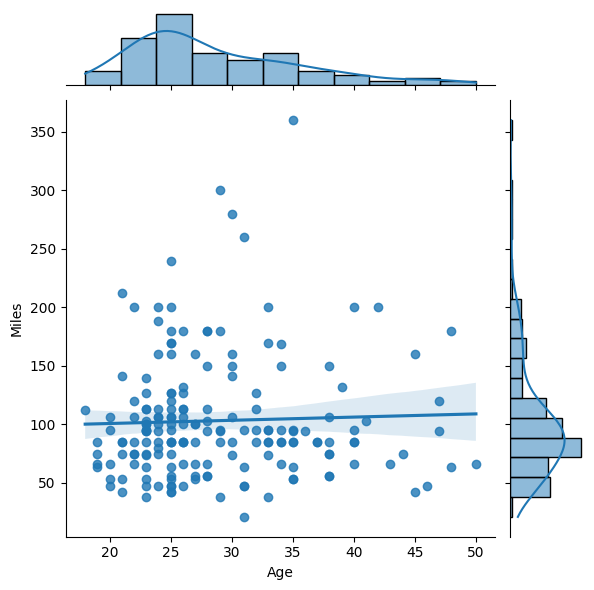

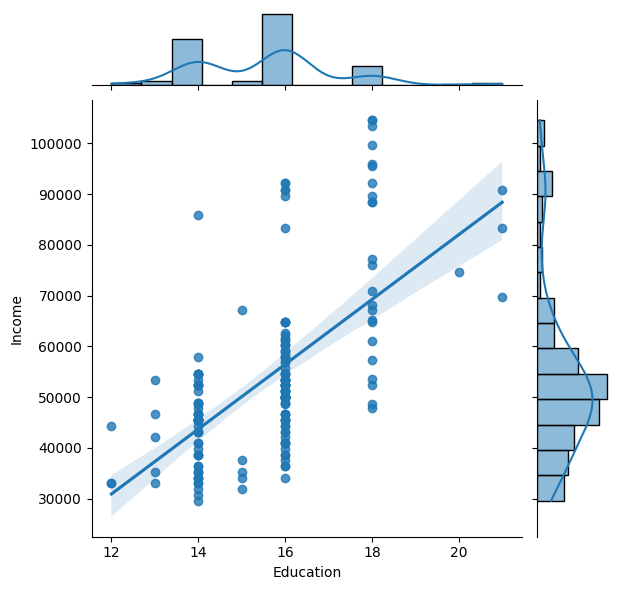

In [ ]:
sns.jointplot(x='Age',y='Miles',data=data,kind='reg')
plt.show()

sns.jointplot(x='Education',y='Income',data=data,kind='reg')
plt.show()

Younger people(age less than 35 ) seems to be more active than the aged people(age>35) according to the above plot.

People with high number of education years have better income than the people with low number of years education.


<Axes: xlabel='Gender', ylabel='count'>

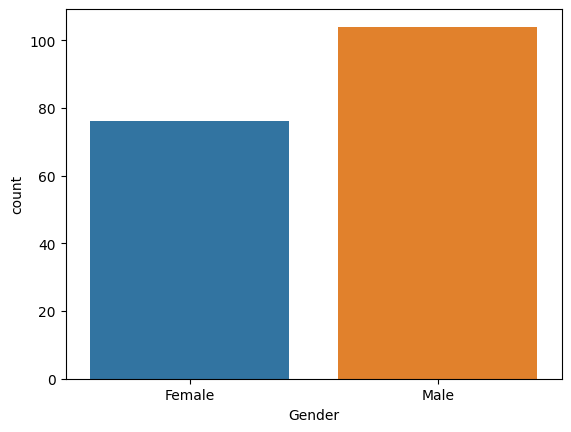

In [ ]:

sns.countplot(x='Gender',data=data)

Male dominates the fitness

<Axes: xlabel='MaritalStatus', ylabel='count'>

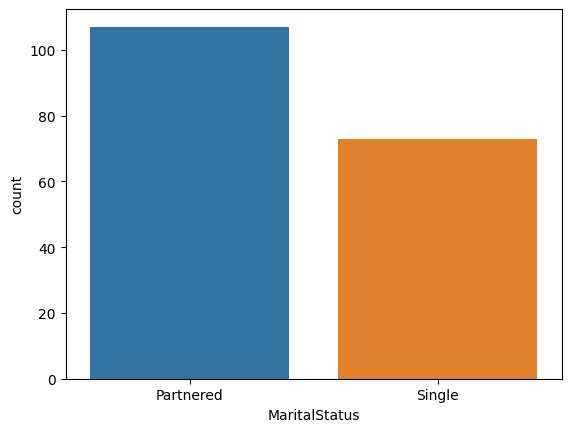

In [ ]:


sns.countplot(x='MaritalStatus',data=data)

There are around 110 people with partnered whereas around 70 people are single

<Axes: xlabel='Fitness', ylabel='count'>

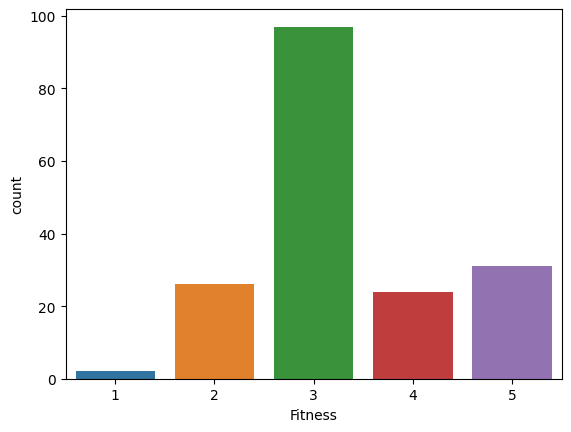

In [ ]:

sns.countplot(x='Fitness',data=data)

This indicates majority are in moderatly fit

<Axes: xlabel='Education', ylabel='count'>

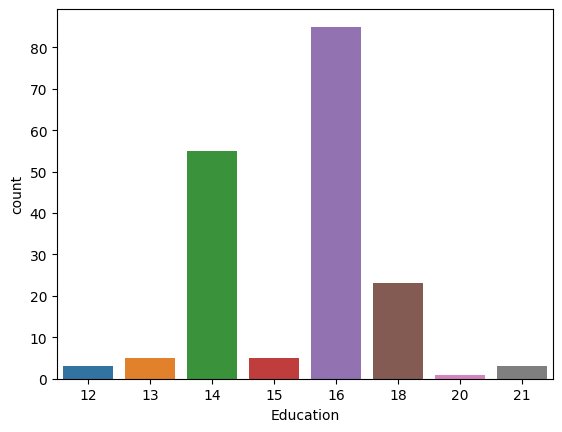

In [ ]:

sns.countplot(x='Education',data=data)

Number of people with 16 years of education is more than 80

# Correlation

In [ ]:

corr=data[['Age','Education','Income','Miles']].corr()
print("correlation:\n\n",corr)

correlation:

                 Age  Education    Income     Miles
Age        1.000000   0.280496  0.513414  0.036618
Education  0.280496   1.000000  0.625827  0.307284
Income     0.513414   0.625827  1.000000  0.543473
Miles      0.036618   0.307284  0.543473  1.000000


<Axes: >

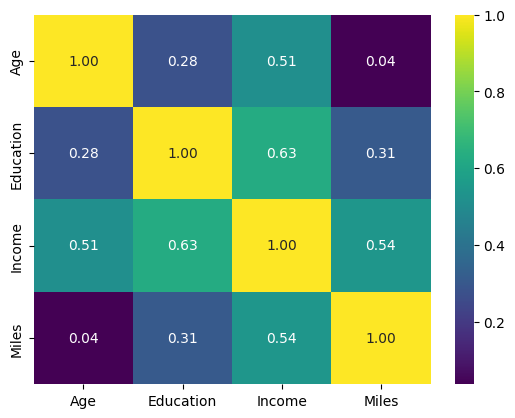

In [ ]:

sns.heatmap(corr,cmap="viridis",fmt=".2f",annot=True)

Income and Education has correlation 0.63.

Income and Miles has correlation of 0.54

Age and Income has correlation of 0.51

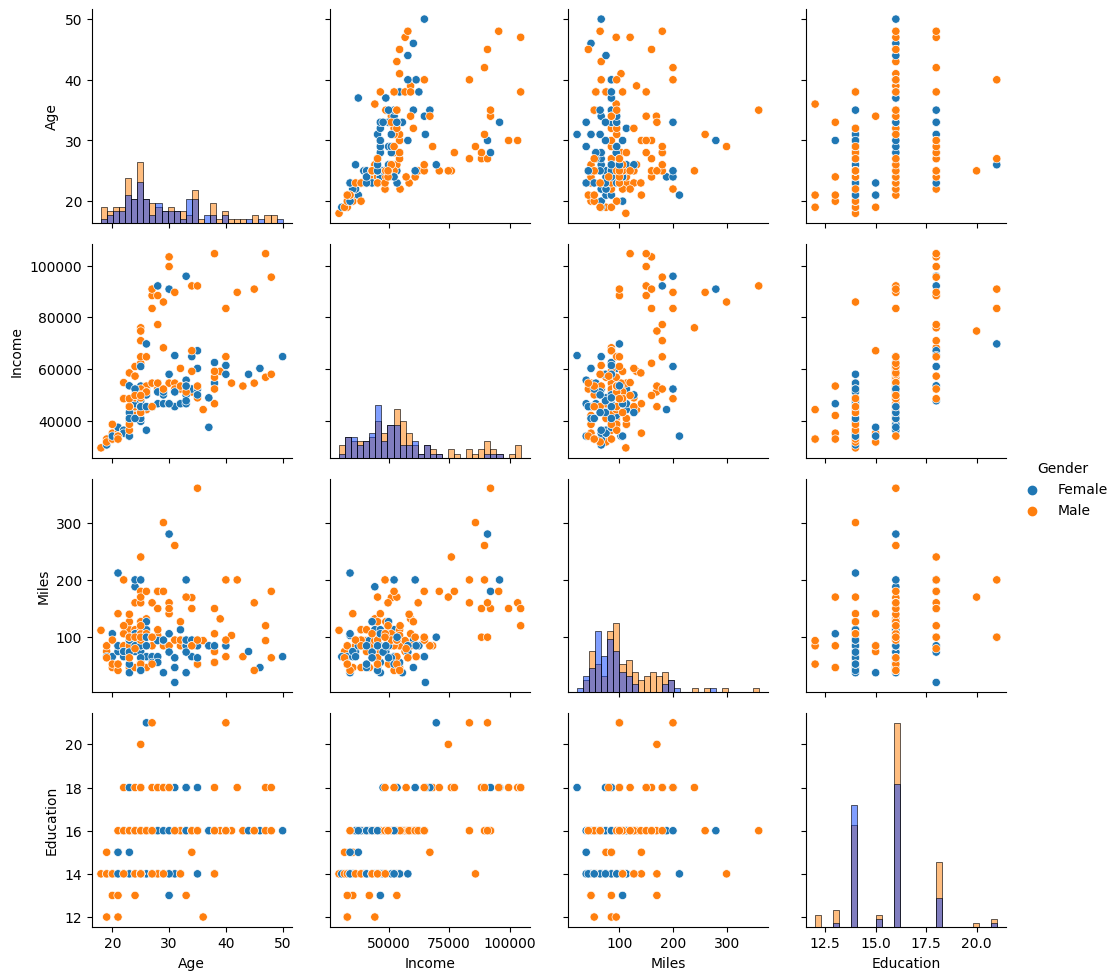

In [ ]:

g = sns.PairGrid(data,vars=['Age','Income','Miles','Education'],hue="Gender")
g.map_diag(sns.histplot,bins=30,palette="bright")
g.map_offdiag(sns.scatterplot,palette="bright")
g.add_legend()

Young people of age less than 35 years are more active than people with age more than 35 years.

In [ ]:
# contigency table for product and gender
conti_table=pd.crosstab(index=data['Product'],columns=data['Gender'])
print("Two-way contigency table between products and gender:\n\n",conti_table)

Two-way contigency table between products and gender:

 Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33


In [ ]:

# conditional probability of product and gender
# normalize each column to have probability
cond_prob_gender=pd.crosstab(index=data['Product'],columns=data['Gender'],normalize="columns")
print("Conditional Probability of Product and Gender:\n\n",cond_prob_gender)

Conditional Probability of Product and Gender:

 Gender     Female      Male
Product                    
KP281    0.526316  0.384615
KP481    0.381579  0.298077
KP781    0.092105  0.317308


Probability of male(among all the males) purpasing KP281 is 0.384615 approximately 38% and Probability of female(among all the females) purpasing KP281 is 0.526316 approximately 52%

Probability of male purpasing KP481 is 0.298077 approximately 30% and Probability of female purpasing KP481 is 0.381579 approximately 38%

Probability of male purpasing KP781 is 0.317308 approximately 32% and Probability of female purpasing KP781 is 0.092105 approximately 9%

In [ ]:
marginal_prob=pd.crosstab(index=data['Product'],columns=data['Gender'],normalize="columns",margins=True)
marginal_prob.columns=['Female','Male','Marginal Prob']
print("Probability of customers purpased each product:\n\n",marginal_prob)

Probability of customers purpased each product:

            Female      Male  Marginal Prob
Product                                   
KP281    0.526316  0.384615       0.444444
KP481    0.381579  0.298077       0.333333
KP781    0.092105  0.317308       0.222222


Approximately 44% customers purpased KP281

Approximately 33% customers purpased KP481

Approximately 22% customers purpased KP781

In [ ]:
#Conditional probability of product and marital status and contigency table
conti_table=pd.crosstab(data['Product'],columns=data['MaritalStatus'])
print("Two-way contigency table between products and marital status:\n\n",conti_table)

Two-way contigency table between products and marital status:

 MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17


In [ ]:

cond_marital=pd.crosstab(data['Product'],columns=data['MaritalStatus'],normalize="columns")
print("Probability of partnered/single purchased each product:\n\n",cond_marital.T)

Probability of partnered/single purchased each product:

 Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877


RECOMMENDATION:

* Those customers whose median income is 80000 dollars and more they are most
puntual in terms of usage as they have usage 6 or 7 times a week. So money is playing a big factor here. These customers are valuable as when waranty expired they most probably will purchase the products again.

* Customers having mean income more than 70000 dollars are more fit than the other customers.This indicates that these customers are very much health concious and company could target customers whose mean income is more than 70000 dollars.

* Among 104 male customers around 38% of them i.e 39 customers purchased KP281 Whereas around 52% female customers of 76 i.e 39 customers purchased KP281 Total=39+39=78 customers of 180 total customers purchased KP281. On the other hand 30% male purchased KP481* and 38% female purchased KP481.

Total customers purchased KP481 is 31+28=59.

Therefore total customers purchased KP281 and KP481 is 137.So this number is way bigger as there is only 180 customers.What company could do here they can focus much on KP281 and KP481 products.Also the money is playing a big factor.

* 44% customers purchased KP281 and 37% purchased KP481.So company should pay more attention to these products.

44% couples of 107 couplers purchased KP281, 33% purchased KP481 and 21% purchased KP781

43% singles of 73 purchased KP281, 32% purchased KP481 and 23% purchased KP781

Again here among couples as well as singles the products KP281 and KP481 are more famous.So company should pay great attention to the products.

* Last but not least around 70 customers with income in the range of 29000 to 59000 dollars have purchased KP281

On the other hand in the same range around 50 customers purchased KP481.

But Customers with income in the range of 29000 to 59000 dollars per annum have purchased around 11 KP781 products. Here money is playing a big factor.Hence company should focus on porducts fall in the category of KP281 and KP481